Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [16]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/CNN_assignment.zip" -d "/content/drive/MyDrive/Colab Notebooks/CNN_assignment"

Archive:  /content/drive/MyDrive/Colab Notebooks/CNN_assignment.zip
replace /content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [19]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [21]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [20]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train", labels = "inferred", seed=123, image_size = (180, 180))

Found 2239 files belonging to 9 classes.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test", labels = "inferred", seed=123, image_size = (180, 180))

Found 118 files belonging to 9 classes.


In [22]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

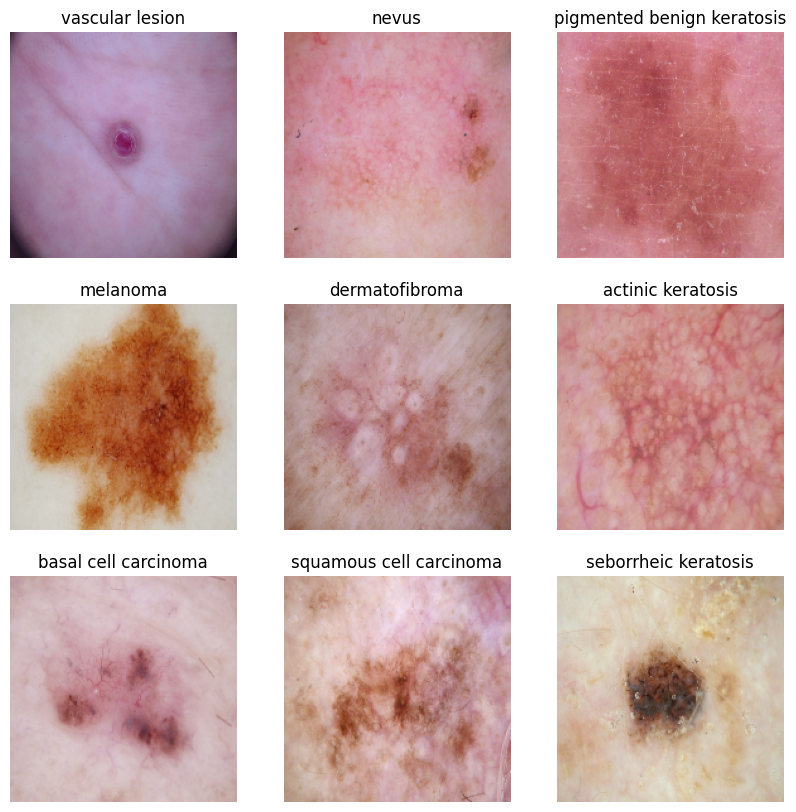

In [23]:
import matplotlib.pyplot as plt

# Create a dictionary to store one image per class
images_per_class = {}

# Iterate through the training dataset
for images, labels in train_ds:
    for i in range(len(images)):
        label = labels[i].numpy()
        class_name = class_names[label]

        # If we haven't stored an image for this class yet, store it
        if class_name not in images_per_class:
            images_per_class[class_name] = images[i].numpy().astype("uint8")

    # Break the loop once we have an image for each class
    if len(images_per_class) == len(class_names):
        break

# Plot the images
plt.figure(figsize=(10, 10))
for i, (class_name, image) in enumerate(images_per_class.items()):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis("off")

plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [24]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [25]:
### Your code goes here
num_classes = len(class_names)

model = models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [26]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# View the summary of all layers
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       7,929,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,024,393 (30.61 MB)

 Trainable params: 8,024,393 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [28]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 26s 255ms/step - accuracy: 0.2361 - loss: 2.0809 - val_accuracy: 0.2627 - val_loss: 2.1555
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4364 - loss: 1.6130 - val_accuracy: 0.3051 - val_loss: 2.2481
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5156 - loss: 1.4321 - val_accuracy: 0.3136 - val_loss: 1.9735
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5538 - loss: 1.2973 - val_accuracy: 0.2797 - val_loss: 2.7338
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5531 - loss: 1.2872 - val_accuracy: 0.3729 - val_loss: 2.4111
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5977 - loss: 1.1467 - val_accuracy: 0.3559 - val_loss: 2.4038
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6244 - loss: 1.0811 - val_accuracy: 0.3475 - val_loss: 2.1933
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6512 - loss: 1.0313 - val_accuracy: 0.3136 -

### Visualizing training results

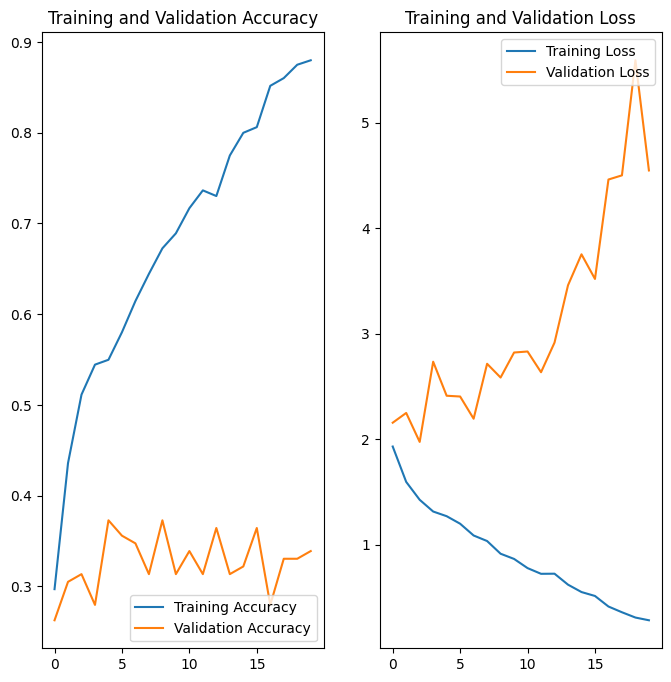

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

there is an evidence of model overfit or underfit

Model overfits to the great extent like mugging up after each epoch and as the training accuracy increases the validation loss increases which means after each epoch the overfitting is increasing in the above case without any dropouts and batch normalization added

### Write your findings here

In [30]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20% of the height
    shear_range=0.2,  # Apply random shear transformations
    zoom_range=0.2,  # Randomly zoom in or out on images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels using the nearest value
)

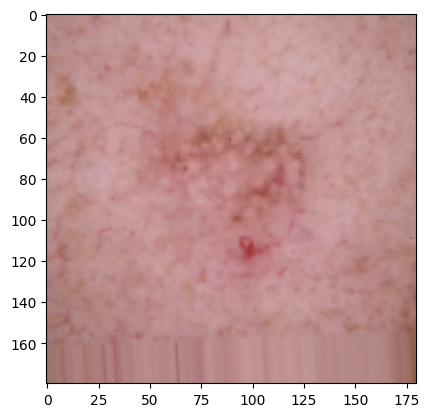

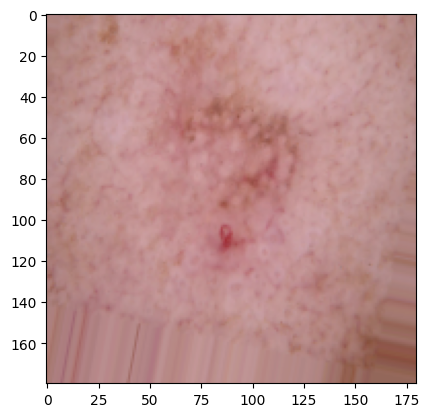

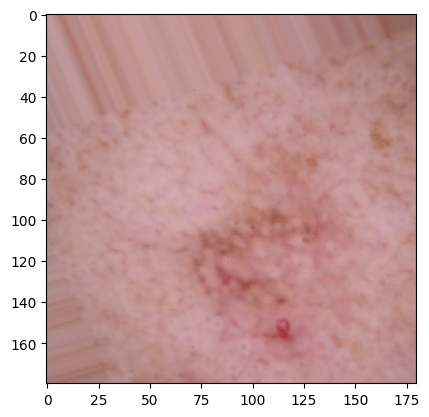

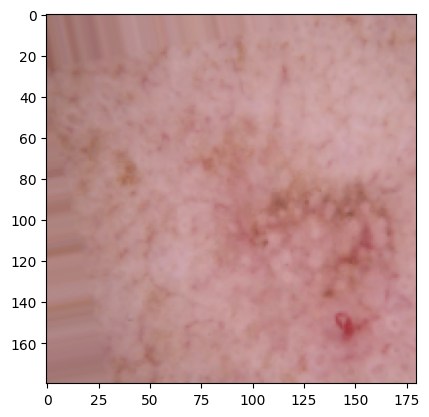

In [31]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

import matplotlib.pyplot as plt
import numpy as np

# Get a single image from the training dataset
for images, labels in train_ds.take(1):
    image = images[0]
    break

# Reshape the image to (1, height, width, channels) for ImageDataGenerator
image = image.numpy().astype("uint8")
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# Generate augmented images
i = 0
for batch in datagen.flow(image, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype("uint8"))
    i += 1
    if i % 4 == 0:
        break  # Display 4 augmented images

plt.show()

### Todo:
### Create the model, compile and train the model


In [32]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),  # Dropout layer with a rate of 0.2

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),  # Dropout layer with a rate of 0.2

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),  # Dropout layer with a rate of 0.2

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),  # Dropout layer with a rate of 0.5
  layers.Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compiling the model

In [33]:
## Your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [34]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.1780 - loss: 2.6490 - val_accuracy: 0.1695 - val_loss: 2.1609
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.2634 - loss: 1.9718 - val_accuracy: 0.1864 - val_loss: 2.1335
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3703 - loss: 1.7788 - val_accuracy: 0.2203 - val_loss: 2.0521
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4009 - loss: 1.6720 - val_accuracy: 0.2966 - val_loss: 2.0328
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4740 - loss: 1.5624 - val_accuracy: 0.2881 - val_loss: 2.1271
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4659 - loss: 1.5024 - val_accuracy: 0.3136 - val_loss: 1.9983
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4579 - loss: 1.5093 - val_accuracy: 0.3220 - val_loss: 1.9067
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4805 - loss: 1.4972 - val_accuracy: 0.3220 - 

### Visualizing the results

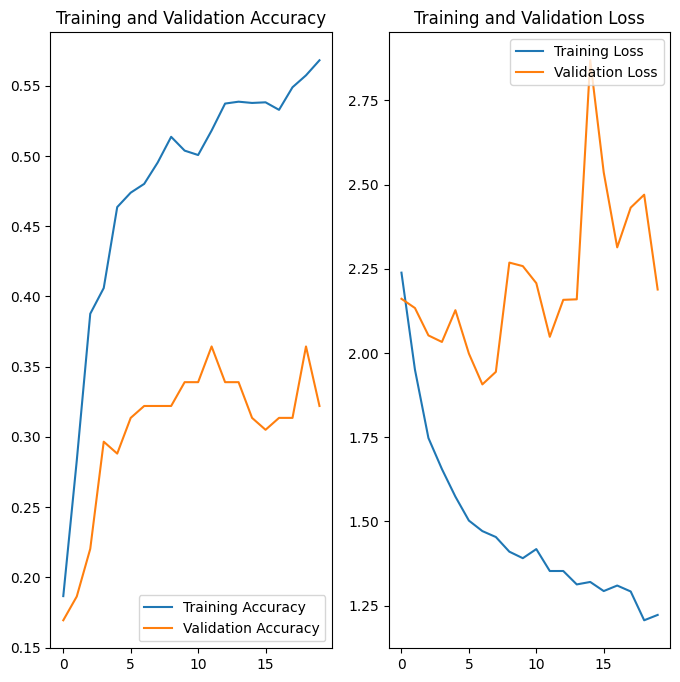

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an

---

evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

evidence of overfit but better than the earlier one from the graphs also its clearly evident

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [36]:
for images, labels in train_ds.take(1):  # Replace `your_dataset` with the dataset variable
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    print("Labels:", labels.numpy())

Images shape: (32, 180, 180, 3)
Labels shape: (32,)
Labels: [5 3 1 7 5 1 8 4 4 5 1 3 4 1 3 3 1 3 0 7 1 2 1 1 4 1 8 0 1 6 7 4]


In [38]:
## Your code goes here.
import tensorflow as tf

# Initialize a list to store labels
all_labels = []

# Iterate over the dataset
for _, labels in train_ds:
    all_labels.extend(labels.numpy().flatten())  # Convert tensor to NumPy array and append

In [ ]:
all_labels

[8,
 2,
 4,
 7,
 4,
 3,
 2,
 1,
 1,
 1,
 5,
 4,
 8,
 7,
 6,
 4,
 3,
 4,
 5,
 8,
 3,
 8,
 3,
 3,
 8,
 8,
 5,
 3,
 5,
 0,
 1,
 4,
 3,
 1,
 1,
 1,
 5,
 3,
 6,
 7,
 8,
 2,
 2,
 5,
 3,
 1,
 0,
 5,
 3,
 5,
 2,
 5,
 5,
 0,
 7,
 7,
 3,
 4,
 3,
 5,
 3,
 1,
 8,
 4,
 7,
 1,
 5,
 3,
 6,
 3,
 3,
 5,
 3,
 5,
 5,
 3,
 5,
 5,
 7,
 5,
 8,
 3,
 1,
 5,
 1,
 3,
 7,
 5,
 8,
 7,
 1,
 7,
 2,
 3,
 5,
 0,
 5,
 1,
 3,
 4,
 3,
 3,
 5,
 5,
 3,
 4,
 3,
 3,
 3,
 3,
 5,
 3,
 1,
 5,
 0,
 5,
 4,
 8,
 1,
 1,
 4,
 4,
 5,
 8,
 5,
 4,
 1,
 6,
 6,
 4,
 3,
 4,
 3,
 1,
 1,
 5,
 4,
 1,
 5,
 3,
 5,
 0,
 3,
 1,
 4,
 4,
 4,
 3,
 4,
 3,
 7,
 8,
 7,
 7,
 3,
 5,
 1,
 3,
 3,
 3,
 3,
 1,
 3,
 7,
 3,
 1,
 5,
 5,
 5,
 3,
 8,
 3,
 8,
 4,
 1,
 3,
 5,
 3,
 1,
 5,
 8,
 5,
 5,
 4,
 3,
 7,
 4,
 3,
 6,
 5,
 1,
 1,
 3,
 1,
 5,
 1,
 1,
 7,
 4,
 5,
 4,
 5,
 3,
 7,
 1,
 0,
 5,
 2,
 0,
 4,
 3,
 0,
 3,
 4,
 5,
 7,
 4,
 4,
 2,
 3,
 0,
 3,
 4,
 5,
 0,
 7,
 0,
 5,
 5,
 7,
 7,
 8,
 5,
 3,
 1,
 2,
 3,
 4,
 4,
 3,
 5,
 3,
 8,
 1,
 4,
 5,
 1,
 3,
 5,
 4,


In [39]:
# Convert the list to a NumPy array for further analysis
all_labels = tf.constant(all_labels)

unique_classes, indices, counts = tf.unique_with_counts(all_labels)
class_distribution = dict(zip(unique_classes.numpy(), counts.numpy()))

print("Class Distribution:")
for class_name, count in class_distribution.items():
    print(f"Class {class_name}: {count} samples")

Class Distribution:
Class 4: 357 samples
Class 8: 139 samples
Class 5: 462 samples
Class 1: 376 samples
Class 3: 438 samples
Class 7: 181 samples
Class 0: 114 samples
Class 2: 95 samples
Class 6: 77 samples


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
ANS: Class 6 has least samples with only 77 samples - seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
Ans: Class 5, 1, 3, 4 dominate the data in terms of proportionate number of samples in the dataset


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [40]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [41]:
import os

path_to_training_dataset = data_dir_train

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset / i)) # Use / and str() here
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D374861B730>: 100%|██████████| 500/500 [00:07<00:00, 68.18 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D3770234190>: 100%|██████████| 500/500 [00:05<00:00, 86.72 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D374875EA70>: 100%|██████████| 500/500 [00:06<00:00, 78.30 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7D37487F0DC0>: 100%|██████████| 500/500 [00:19<00:00, 25.95 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2592x1944 at 0x7D37705F5F00>: 100%|██████████| 500/500 [00:20<00:00, 24.34 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D3748601060>: 100%|██████████| 500/500 [00:05<00:00, 84.86 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7D3770237820>: 100%|██████████| 500/500 [00:09<00:00, 52.41 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D377A224F10>: 100%|██████████| 500/500 [00:05<00:00, 87.72 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D3748601C30>: 100%|██████████| 500/500 [00:06<00:00, 81.95 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [42]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500



### Lets see the distribution of augmented data after adding new images to the original training data.

In [43]:
import os
import glob

path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))]
path_list_new

['/content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026709.jpg_fddd6036-afb8-4f3d-a18a-e55bedc796fb.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030730.jpg_1e749454-6a78-497b-b584-34a1ebc25d57.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027829.jpg_ad1cf1dd-7ced-4545-b942-c73a72fdfc2c.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026650.jpg_0a9aadd1-abad-40b1-8c4e-3d6449292280.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN_assignment/

In [44]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [49]:
import os
import glob
import pandas as pd

path_to_training_dataset = "/content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"  # Replace with your path

path_list = []
lesion_list = []
for class_name in os.listdir(path_to_training_dataset):
    class_path = os.path.join(path_to_training_dataset, class_name)
    for image_path in glob.glob(os.path.join(class_path, '*.jpg')):
        path_list.append(image_path)
        lesion_list.append(class_name)

original_df = pd.DataFrame({'Path': path_list, 'Label': lesion_list})


In [50]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [52]:
new_df = pd.concat([original_df, df2], ignore_index=True)

In [53]:
new_df['Label'].value_counts()

,count
Label,
pigmented benign keratosis,962
melanoma,938
basal cell carcinoma,876
nevus,857
squamous cell carcinoma,681
vascular lesion,639
actinic keratosis,614
dermatofibroma,595
seborrheic keratosis,577


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [54]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [63]:
data_dir_train = "/content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"  # Path to directory with original and augmented data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  labels='inferred',
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [64]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  labels='inferred',
  label_mode='int',
  seed=123,
  validation_split=0.2,
  subset="validation",  # Use 'validation' for validation data
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [65]:
num_classes = len(train_ds.class_names)  # Get the number of classes

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Normalization layer
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [66]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [67]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - accuracy: 0.1904 - loss: 2.3061 - val_accuracy: 0.3823 - val_loss: 1.6841
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - accuracy: 0.4413 - loss: 1.5037 - val_accuracy: 0.4959 - val_loss: 1.3605
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - accuracy: 0.5363 - loss: 1.2453 - val_accuracy: 0.5902 - val_loss: 1.1614
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.6107 - loss: 1.0409 - val_accuracy: 0.6288 - val_loss: 1.0281
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - accuracy: 0.6887 - loss: 0.8620 - val_accuracy: 0.6815 - val_loss: 0.9208
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.7303 - loss: 0.7356 - val_accuracy: 0.7238 - val_loss: 0.8188
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.7765 - loss: 0.6349 - val_accuracy: 0.7409 - val_loss: 0.7766
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - accuracy: 0.8068 - loss: 0.5374 -

#### **Todo:**  Visualize the model results

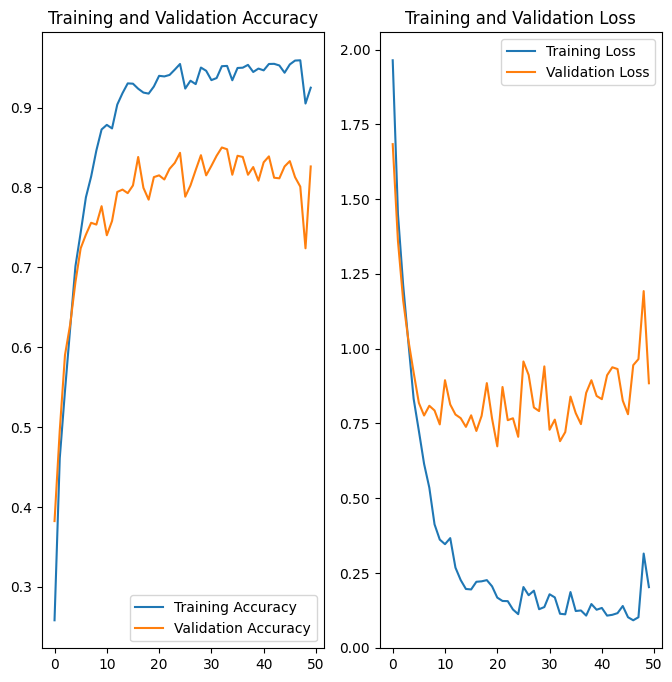

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



The accuracy is much better right now after the class imbalance treatment and it has given outstanding results than the previous neural networks.
Overfitting is definitely addressed.                                                                                                                                                                                                                                                                                                                                                   